In [1]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
dataset_name = 'winequality_white'
shapes = {
    'S': (9,6,4),
    'V2': (5,),
    'V3': (4,),
    'V4': (3,)
}
epochs = 50
num_tries = 6

random_seed = 42
random_seeds = random.sample(range(0, 4294967295), num_tries)
curr_try = -1

def datasets_generator_fun():
    global curr_try
    global random_seeds
    global dataset_name
    curr_try += 1
    curr_try = curr_try % num_tries
    return get_validation_datasets(dataset_name, random_seed=random_seeds[curr_try], feature_range=(0,1), test_ratio=0)
    
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([11], [1])


### S(X,X,X)

Average elapsed k-fold validation time: 100.91870 sec
Last measures: [0.2526077330112457, 0.2490362673997879, 0.015914935618638992, 0.27772101759910583, 0.2452048510313034, 0.019808823242783546, 0.2490362673997879, 0.23469391465187073, 0.015424691140651703, 0.01372395921498537, 0.2526077330112457, 0.017550667747855186, 0.23469391465187073, 0.015461268834769726, 0.013725756667554379, 0.2526077330112457, 0.023251788690686226, 0.016006145626306534, 0.02283160760998726, 0.2452048510313034, 0.01992403343319893, 0.017360443249344826, 0.022004036232829094, 0.27772101759910583, 0.2452048510313034, 0.2526077330112457, 0.2490362673997879, 0.01601465232670307, 0.015379359014332294, 0.01386881060898304]
Loss history average: [0.19654385 0.13857938 0.13274359 0.13022122 0.12886218 0.12813705
 0.12772973 0.12747483 0.12729817 0.12716833 0.1270698  0.12699327
 0.12693212 0.12688232 0.12684116 0.12680685 0.12677833 0.1267547
 0.12673499 0.12671847 0.12670461 0.12669276 0.12668305 0.12667417
 0.1266668

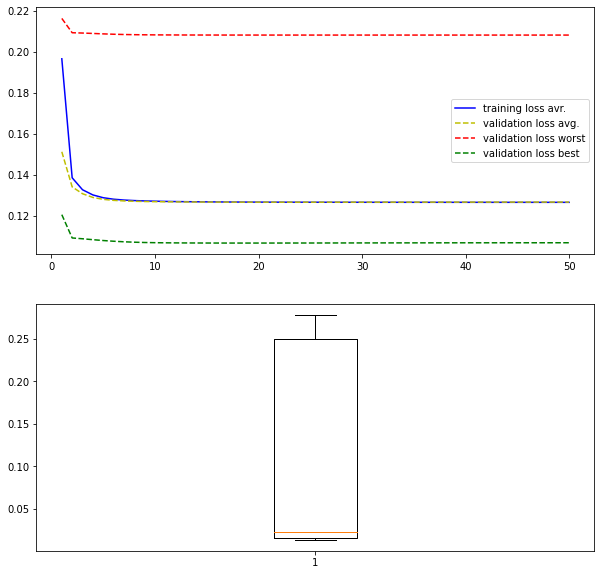

In [3]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=shapes['S'], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(2)

Average elapsed k-fold validation time: 126.27629 sec
Last measures: [0.020175794139504433, 0.017584092915058136, 0.23469391465187073, 0.27772101759910583, 0.013829546980559826, 0.2526077330112457, 0.017556272447109222, 0.016119424253702164, 0.27772101759910583, 0.2452048510313034, 0.2526077330112457, 0.2490362673997879, 0.022221200168132782, 0.27772101759910583, 0.013334815390408039, 0.020309019833803177, 0.02325056679546833, 0.23469391465187073, 0.015437212772667408, 0.2452048510313034, 0.020250454545021057, 0.01701475866138935, 0.01570410653948784, 0.27772101759910583, 0.0138376634567976, 0.020207663998007774, 0.017044933512806892, 0.016625305637717247, 0.27772101759910583, 0.2452048510313034]
Loss history average: [0.19543526 0.13600118 0.12177024 0.1205701  0.12031748 0.12009662
 0.11984487 0.11958125 0.11933892 0.11914102 0.11898766 0.11886906
 0.11877426 0.118695   0.11862602 0.11856481 0.1185096  0.11845883
 0.11841125 0.11836568 0.11832133 0.11827813 0.11823649 0.11819651
 0.1

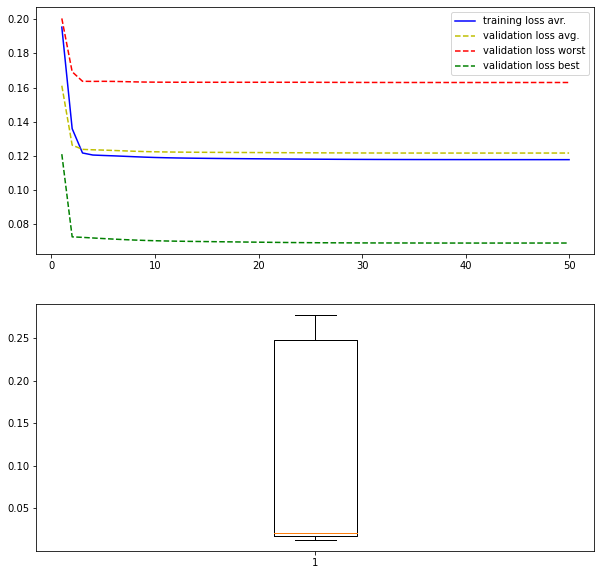

In [4]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(2)

Average elapsed k-fold validation time: 141.87272 sec
Last measures: [0.020209643989801407, 0.2490362673997879, 0.23469391465187073, 0.27772101759910583, 0.2452048510313034, 0.2526077330112457, 0.2490362673997879, 0.23469391465187073, 0.27772101759910583, 0.2452048510313034, 0.2526077330112457, 0.017665134742856026, 0.23469391465187073, 0.01574118062853813, 0.013852267526090145, 0.01977659948170185, 0.01795586384832859, 0.23469391465187073, 0.27772101759910583, 0.013878168538212776, 0.02022363804280758, 0.2490362673997879, 0.01598275639116764, 0.27772101759910583, 0.2452048510313034, 0.2526077330112457, 0.2490362673997879, 0.23469391465187073, 0.27772101759910583, 0.014087663032114506]
Loss history average: [0.21262276 0.17953558 0.17506883 0.17498557 0.17491154 0.17483606
 0.17475851 0.17467836 0.17459527 0.17450916 0.17442022 0.17432899
 0.17423637 0.17414362 0.1740524  0.17396456 0.17388183 0.17380528
 0.17373581 0.17367401 0.17361947 0.17357161 0.1735296  0.1734927
 0.17345986 0.17

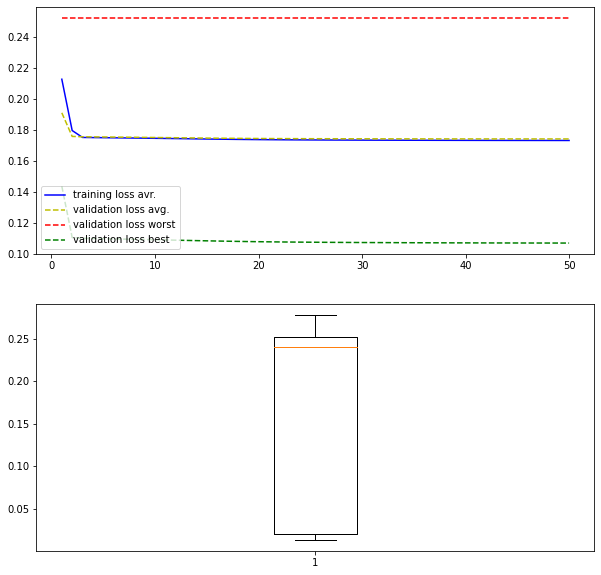

In [5]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(3)

Average elapsed k-fold validation time: 94.83040 sec
Last measures: [0.020109547302126884, 0.2490362673997879, 0.23469391465187073, 0.015397733077406883, 0.2452048510313034, 0.020265396684408188, 0.017085395753383636, 0.23469391465187073, 0.27772101759910583, 0.2452048510313034, 0.020101938396692276, 0.017004532739520073, 0.0160149484872818, 0.27772101759910583, 0.013913617469370365, 0.024227755144238472, 0.017060086131095886, 0.016134371981024742, 0.27772101759910583, 0.016686689108610153, 0.024229256436228752, 0.01703091897070408, 0.23469391465187073, 0.015219747088849545, 0.016685767099261284, 0.2526077330112457, 0.017063001170754433, 0.02196585014462471, 0.01515877153724432, 0.2452048510313034]
Loss history average: [0.19110895 0.13114579 0.1121905  0.10831559 0.10640059 0.10547866
 0.10500932 0.10473414 0.10454485 0.10440057 0.10428452 0.10418894
 0.10410911 0.10404118 0.10398232 0.10393038 0.1038832  0.10383871
 0.10379532 0.10375259 0.10371148 0.10367239 0.10363527 0.10360039
 0

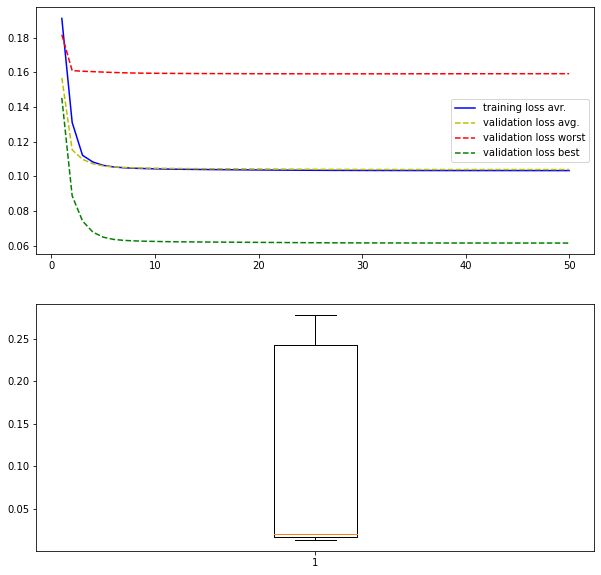

In [6]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(3)

Average elapsed k-fold validation time: 113.78284 sec
Last measures: [0.2526077330112457, 0.018153436481952667, 0.01603848673403263, 0.015453397296369076, 0.013901405967772007, 0.020477894693613052, 0.2490362673997879, 0.021973272785544395, 0.27772101759910583, 0.013836018741130829, 0.020048851147294044, 0.2490362673997879, 0.016039947047829628, 0.015706369653344154, 0.013878179714083672, 0.01977493241429329, 0.018192563205957413, 0.01657741703093052, 0.27772101759910583, 0.01366533525288105, 0.0199568048119545, 0.017625074833631516, 0.016054408624768257, 0.27772101759910583, 0.01393830869346857, 0.019940733909606934, 0.2490362673997879, 0.23469391465187073, 0.27772101759910583, 0.013921677134931087]
Loss history average: [0.18330758 0.10673933 0.09174194 0.09064088 0.09005752 0.0896993
 0.08943861 0.08919632 0.0889642  0.08873437 0.08850106 0.08828273
 0.08807815 0.08788597 0.08770729 0.08754416 0.0873972  0.08726978
 0.08716198 0.08706955 0.0869903  0.08692171 0.08686177 0.08680899
 

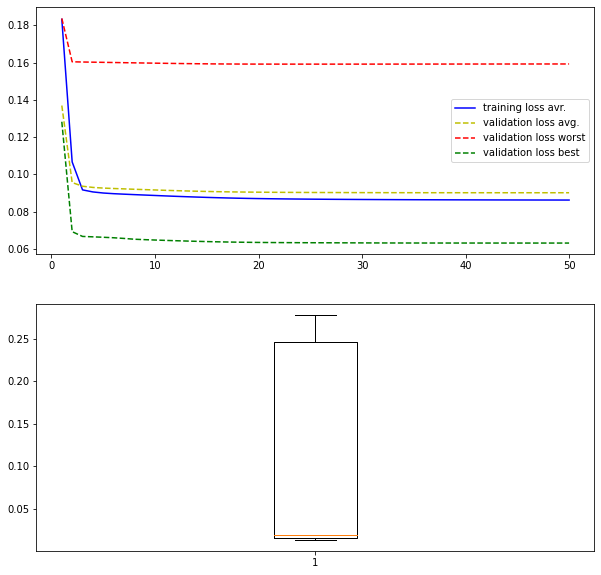

In [7]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(4)

Average elapsed k-fold validation time: 97.30178 sec
Last measures: [0.2526077330112457, 0.2490362673997879, 0.23469391465187073, 0.015287778340280056, 0.01668444275856018, 0.024229280650615692, 0.017024680972099304, 0.23469391465187073, 0.27772101759910583, 0.2452048510313034, 0.024228643625974655, 0.017075825482606888, 0.016157696023583412, 0.015441754832863808, 0.013837010599672794, 0.024228062480688095, 0.01701640523970127, 0.23469391465187073, 0.015270054340362549, 0.013827274553477764, 0.020516473799943924, 0.017057158052921295, 0.016077516600489616, 0.015405252575874329, 0.2452048510313034, 0.2526077330112457, 0.016988364979624748, 0.23469391465187073, 0.27772101759910583, 0.013881316408514977]
Loss history average: [0.19714738 0.1294111  0.1102039  0.1074058  0.10615472 0.10549853
 0.10511877 0.10486986 0.1046898  0.10455346 0.10444858 0.10436556
 0.10429831 0.104241   0.1041896  0.10414156 0.10409497 0.10404877
 0.10400191 0.10395521 0.10391077 0.10386905 0.10382999 0.10379272

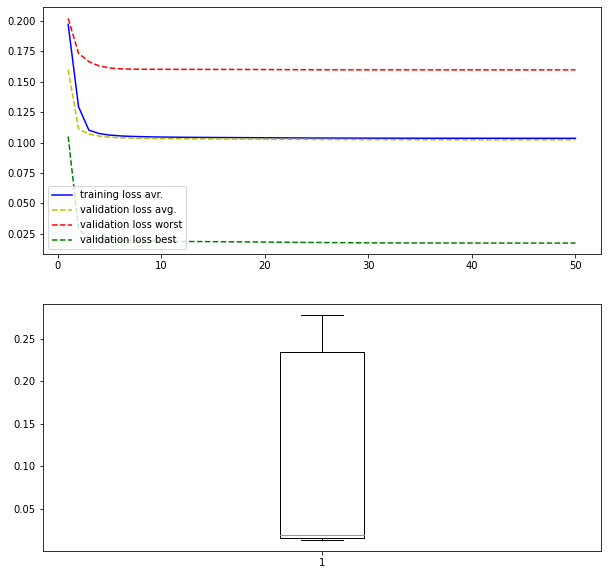

In [8]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(4)

Average elapsed k-fold validation time: 112.63852 sec
Last measures: [0.2526077330112457, 0.01786043867468834, 0.23469391465187073, 0.27772101759910583, 0.016683978959918022, 0.2526077330112457, 0.018162989988923073, 0.23469391465187073, 0.022831548005342484, 0.01403622142970562, 0.2526077330112457, 0.2490362673997879, 0.23469391465187073, 0.27772101759910583, 0.016684705391526222, 0.2526077330112457, 0.2490362673997879, 0.23469391465187073, 0.27772101759910583, 0.013172388076782227, 0.2526077330112457, 0.2490362673997879, 0.01600995473563671, 0.27772101759910583, 0.014038302935659885, 0.2526077330112457, 0.2490362673997879, 0.015842927619814873, 0.27772101759910583, 0.2452048510313034]
Loss history average: [0.21668803 0.18603438 0.17814356 0.17613588 0.17520659 0.17480324
 0.1746196  0.17451257 0.17443494 0.17436563 0.17429901 0.17423474
 0.17417276 0.17411393 0.17405921 0.17400918 0.17396445 0.17392504
 0.17389079 0.17386094 0.17383514 0.17381243 0.173792   0.17377354
 0.17375637 0.

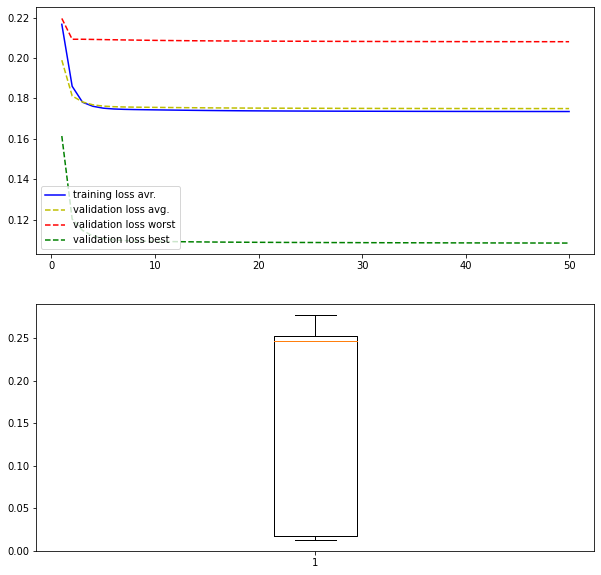

In [9]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)